In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
def load_dataset():
    all_data = []
    all_labels = []

    for file in os.listdir():
        if file.endswith(".csv"):
            df = pd.read_csv(file, header=None)
            all_data.append(df.iloc[:, :-1].values)
            all_labels.extend(df.iloc[:, -1].values)

    X = np.vstack(all_data)
    y = np.array(all_labels)

    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)

    return X, y_encoded, encoder

In [3]:
X, y, encoder = load_dataset()
num_classes = len(encoder.classes_)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(126,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss', mode='min')
earlystop_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [8]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr_cb]
)

Epoch 1/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3565 - loss: 2.3147

185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3574 - loss: 2.3106 - val_accuracy: 0.3500 - val_loss: 2.5111 - learning_rate: 0.0010
Epoch 2/50
179/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7907 - loss: 0.6454

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7919 - loss: 0.6419 - val_accuracy: 0.6872 - val_loss: 1.2566 - learning_rate: 0.0010
Epoch 3/50
183/185 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8793 - loss: 0.3795

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8795 - loss: 0.3790 - val_accuracy: 0.6804 - val_loss: 1.0279 - learning_rate: 0.0010
Epoch 4/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9112 - loss: 0.2684

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9113 - loss: 0.2683 - val_accuracy: 0.8264 - val_loss: 0.5234 - learning_rate: 0.0010
Epoch 5/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9233 - loss: 0.2207 - val_accuracy: 0.7020 - val_loss: 0.9471 - learning_rate: 0.0010
Epoch 6/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9281 - loss: 0.2212 - val_accuracy: 0.6865 - val_loss: 0.9906 - learning_rate: 0.0010
Epoch 7/50
181/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9331 - loss: 0.1967
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9333 - loss: 0.1962 - val_accuracy: 0.7709 - val_loss: 0.8530 - learning_rate: 0.0010
Epoch 8/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9553 - loss: 0.1331

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9554 - loss: 0.1329 - val_accuracy: 0.9291 - val_loss: 0.1794 - learning_rate: 5.0000e-04
Epoch 9/50
179/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9715 - loss: 0.0860

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9714 - loss: 0.0862 - val_accuracy: 0.9682 - val_loss: 0.1091 - learning_rate: 5.0000e-04
Epoch 10/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9724 - loss: 0.0833 - val_accuracy: 0.9541 - val_loss: 0.1101 - learning_rate: 5.0000e-04
Epoch 11/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9706 - loss: 0.0905 - val_accuracy: 0.9466 - val_loss: 0.1154 - learning_rate: 5.0000e-04
Epoch 12/50
181/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9752 - loss: 0.0777

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9752 - loss: 0.0777 - val_accuracy: 0.9696 - val_loss: 0.0827 - learning_rate: 5.0000e-04
Epoch 13/50
183/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9744 - loss: 0.0750

185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9744 - loss: 0.0750 - val_accuracy: 0.9926 - val_loss: 0.0417 - learning_rate: 5.0000e-04
Epoch 14/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9746 - loss: 0.0768 - val_accuracy: 0.9811 - val_loss: 0.0654 - learning_rate: 5.0000e-04
Epoch 15/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9717 - loss: 0.0806 - val_accuracy: 0.9709 - val_loss: 0.0675 - learning_rate: 5.0000e-04
Epoch 16/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9671 - loss: 0.0868
Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9671 - loss: 0.0868 - val_accuracy: 0.9777 - val_loss: 0.0681 - learning_rate: 5.0000e-04
Epoch 17/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9877 - loss: 0.0458

185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9877 - loss: 0.0457 - val_accuracy: 0.9939 - val_loss: 0.0195 - learning_rate: 2.5000e-04
Epoch 18/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9877 - loss: 0.0416

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9877 - loss: 0.0416 - val_accuracy: 0.9926 - val_loss: 0.0156 - learning_rate: 2.5000e-04
Epoch 19/50
183/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9909 - loss: 0.0330

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9909 - loss: 0.0330 - val_accuracy: 1.0000 - val_loss: 0.0071 - learning_rate: 2.5000e-04
Epoch 20/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9899 - loss: 0.0356 - val_accuracy: 0.9757 - val_loss: 0.0336 - learning_rate: 2.5000e-04
Epoch 21/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9899 - loss: 0.0340 - val_accuracy: 0.9865 - val_loss: 0.0219 - learning_rate: 2.5000e-04
Epoch 22/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9821 - loss: 0.0515
Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9821 - loss: 0.0515 - val_accuracy: 0.9547 - val_loss: 0.1045 - learning_rate: 2.5000e-04
Epoch 23/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9890 - loss: 0.0387 - val_accuracy: 0.9946 - val_loss: 0.0090 - learning_rate: 1.2500e-04
Epoch 24/50
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9918 - 

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9918 - loss: 0.0255 - val_accuracy: 1.0000 - val_loss: 0.0041 - learning_rate: 1.2500e-04
Epoch 25/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9914 - loss: 0.0266 - val_accuracy: 0.9966 - val_loss: 0.0075 - learning_rate: 1.2500e-04
Epoch 26/50
179/185 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9912 - loss: 0.0264

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9913 - loss: 0.0263 - val_accuracy: 1.0000 - val_loss: 0.0022 - learning_rate: 1.2500e-04
Epoch 27/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9917 - loss: 0.0276 - val_accuracy: 1.0000 - val_loss: 0.0059 - learning_rate: 1.2500e-04
Epoch 28/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9934 - loss: 0.0232 - val_accuracy: 1.0000 - val_loss: 0.0029 - learning_rate: 1.2500e-04
Epoch 29/50
183/185 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9955 - loss: 0.0217
Epoch 29: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9955 - loss: 0.0217 - val_accuracy: 1.0000 - val_loss: 0.0035 - learning_rate: 1.2500e-04
Epoch 30/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9944 - loss: 0.0189 - val_accuracy: 1.0000 - val_loss: 0.0041 - learning_rate: 6.2500e-05
Epoch 31/50
182/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9956 

185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9956 - loss: 0.0182 - val_accuracy: 1.0000 - val_loss: 0.0022 - learning_rate: 6.2500e-05
Epoch 32/50
183/185 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9958 - loss: 0.0175
Epoch 32: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9958 - loss: 0.0175 - val_accuracy: 1.0000 - val_loss: 0.0027 - learning_rate: 6.2500e-05
Epoch 33/50
179/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9933 - loss: 0.0205

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9933 - loss: 0.0204 - val_accuracy: 1.0000 - val_loss: 0.0021 - learning_rate: 3.1250e-05
Epoch 34/50
179/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9948 - loss: 0.0192

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9948 - loss: 0.0192 - val_accuracy: 1.0000 - val_loss: 0.0016 - learning_rate: 3.1250e-05
Epoch 35/50
180/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9968 - loss: 0.0164

185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9968 - loss: 0.0164 - val_accuracy: 1.0000 - val_loss: 0.0016 - learning_rate: 3.1250e-05
Epoch 36/50
178/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9953 - loss: 0.0186

185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9953 - loss: 0.0186 - val_accuracy: 1.0000 - val_loss: 0.0013 - learning_rate: 3.1250e-05
Epoch 37/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9972 - loss: 0.0136 - val_accuracy: 1.0000 - val_loss: 0.0015 - learning_rate: 3.1250e-05
Epoch 38/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9966 - loss: 0.0152 - val_accuracy: 1.0000 - val_loss: 0.0013 - learning_rate: 3.1250e-05
Epoch 39/50
180/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9956 - loss: 0.0198
Epoch 39: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9955 - loss: 0.0198 - val_accuracy: 1.0000 - val_loss: 0.0013 - learning_rate: 3.1250e-05
Epoch 40/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9955 - loss: 0.0180

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9955 - loss: 0.0180 - val_accuracy: 1.0000 - val_loss: 0.0011 - learning_rate: 1.5625e-05
Epoch 41/50
181/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9971 - loss: 0.0145

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9971 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 0.0011 - learning_rate: 1.5625e-05
Epoch 42/50
179/185 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9968 - loss: 0.0133

185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9967 - loss: 0.0134 - val_accuracy: 1.0000 - val_loss: 0.0011 - learning_rate: 1.5625e-05
Epoch 43/50
183/185 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9964 - loss: 0.0174
Epoch 43: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9964 - loss: 0.0174 - val_accuracy: 1.0000 - val_loss: 0.0011 - learning_rate: 1.5625e-05
Epoch 44/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9954 - loss: 0.0145

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9954 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 0.0011 - learning_rate: 7.8125e-06
Epoch 45/50
182/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9978 - loss: 0.0126

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9977 - loss: 0.0126 - val_accuracy: 1.0000 - val_loss: 0.0010 - learning_rate: 7.8125e-06
Epoch 46/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9958 - loss: 0.0148 - val_accuracy: 1.0000 - val_loss: 0.0011 - learning_rate: 7.8125e-06
Epoch 47/50
182/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9968 - loss: 0.0137

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9968 - loss: 0.0137 - val_accuracy: 1.0000 - val_loss: 9.4596e-04 - learning_rate: 7.8125e-06
Epoch 48/50
182/185 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9944 - loss: 0.0163
Epoch 48: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9944 - loss: 0.0163 - val_accuracy: 1.0000 - val_loss: 9.7865e-04 - learning_rate: 7.8125e-06
Epoch 49/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9965 - loss: 0.0152 - val_accuracy: 1.0000 - val_loss: 0.0010 - learning_rate: 3.9063e-06
Epoch 50/50
178/185 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9967 - loss: 0.0138

185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9967 - loss: 0.0140 - val_accuracy: 1.0000 - val_loss: 9.2549e-04 - learning_rate: 3.9063e-06


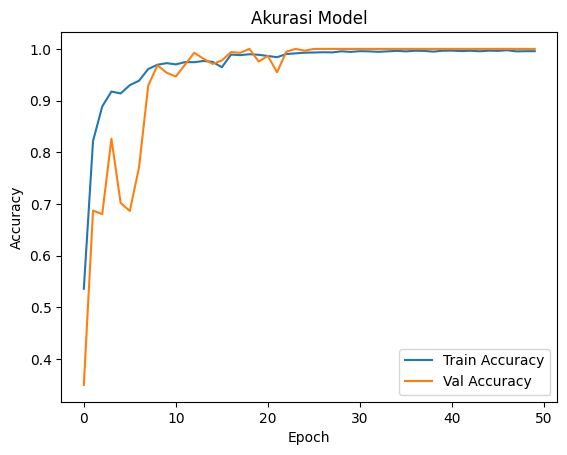

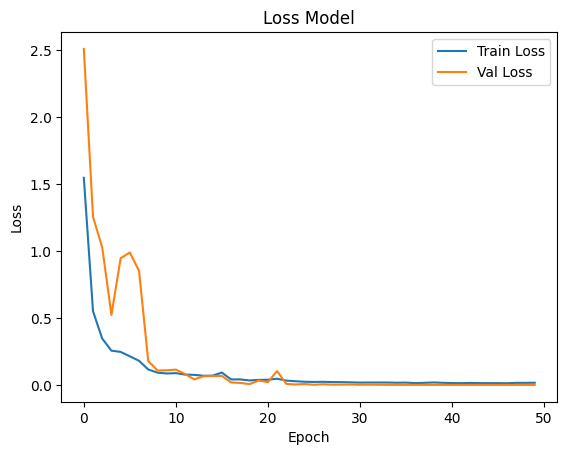

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Akurasi Model')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Model')
plt.show()

In [10]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=16)
print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_acc:.4f}')

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.1460e-04
Validation loss: 0.0009
Validation accuracy: 1.0000


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


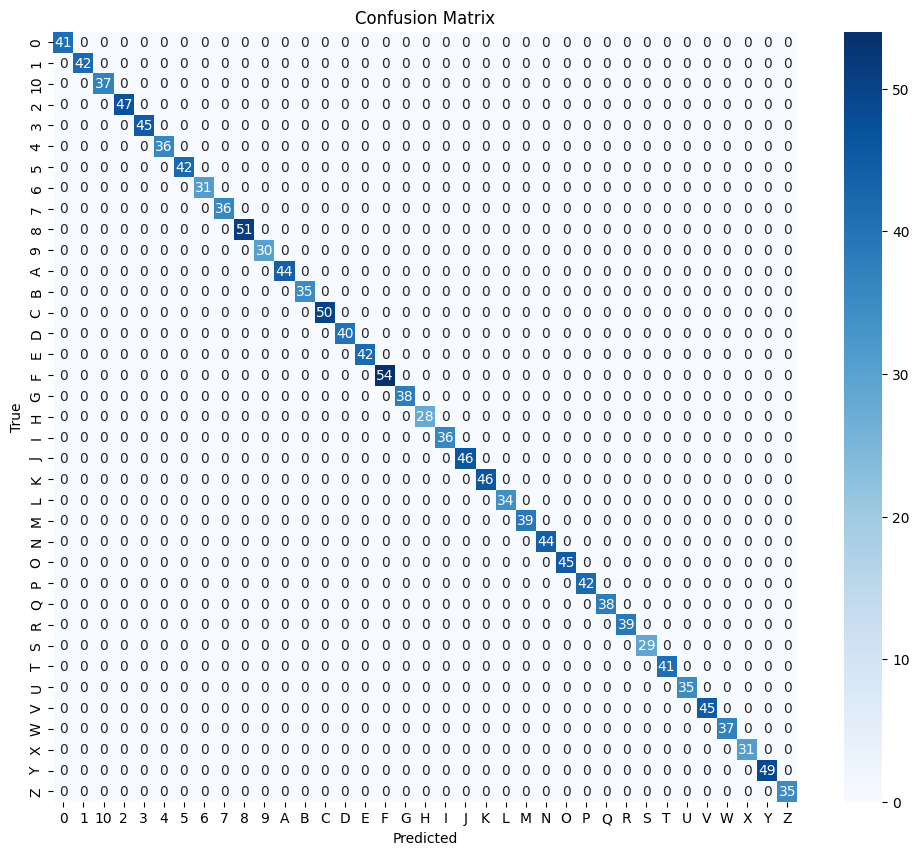

In [11]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [12]:
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        42
          10       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        51
           9       1.00      1.00      1.00        30
           A       1.00      1.00      1.00        44
           B       1.00      1.00      1.00        35
           C       1.00      1.00      1.00        50
           D       1.00      1.00      1.00        40
           E       1.00      1.00      1.00        42
           F       1.00      1.00      1.00        54
           G       1.00    

In [13]:
np.save("label_classes.npy", encoder.classes_)

In [14]:
# Load model .h5
model = tf.keras.models.load_model("best_model.h5")

# Konversi ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan file .tflite
with open("best_model.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp3opigz29'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 126), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 37), dtype=tf.float32, name=None)
Captures:
  140345891517456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140345891515536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140345891515152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140345891515920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140345891516880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140345891510736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140345891519184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140345891512848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140345891514576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140345800255312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140345891518416: Tenso